In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/notebook/insurance.csv")

In [3]:
#To show first 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#Here target variable is insuranceclaim 
#to predict yes/no for insuranceclaim or not
#means this problem is classification 

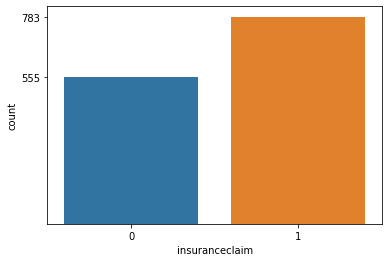

In [5]:
#First check data is balance or imbalance 
sns.countplot(data=df,x="insuranceclaim")
f=df["insuranceclaim"].value_counts()
plt.yticks(f)
plt.show()

In [6]:
#check null values 
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
#check datatypes 
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [8]:
#select input and output
X=df.drop("insuranceclaim",axis=1)
Y=df["insuranceclaim"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
#Apply standard scaler on X_train and X_test (only input)
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [11]:
X.shape

(1338, 7)

In [12]:
#No. of features /columns
X.shape[1]

7

In [13]:
#Create a Neural network (NN)
import tensorflow as tf
#create object of Sequential class and pass the list of the layers 
model=tf.keras.Sequential([
  tf.keras.layers.Dense(units=10,activation='relu',input_shape=(X.shape[1],)),
  #hidden layer1
  tf.keras.layers.Dense(units=10,activation='relu'), #hidden layer2
  tf.keras.layers.Dense(units=1,activation='sigmoid') #output layer
                           ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [15]:
#compile the model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
#loss='binary_crossentropy' because classification algo with 2 class
#binary means 0 and 1 
#if regression problem then use loss='mse'  or loss='mae'

In [16]:
#train the model 
trained_model=model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
30/30 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.5011
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.6111
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.6720
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7479
Epoch 5/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7810
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.8034
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.8216
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8344
Epoch 9/50
30/30 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8355
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8451
Epoch 11/50
30/30 [

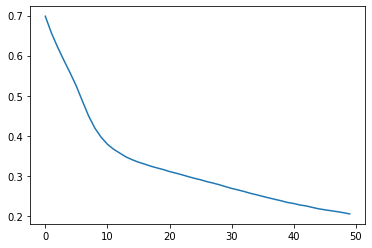

In [17]:
plt.plot(trained_model.history["loss"])
plt.show()

In [18]:
#Test the model
Y_pred=model.predict(X_test)

In [19]:
dic={'Actual Output':Y_test}
df1=pd.DataFrame(dic)
df1['Predicted Output']=Y_pred
df1.head(10)

,Actual Output,Predicted Output
559,1,0.987774
1087,1,0.987623
1020,1,0.997436
460,0,0.060821
802,0,0.049607
298,1,0.933465
481,1,0.724500
616,1,0.940858
763,1,0.617952
750,1,0.989230


In [20]:
Y_pred=np.where(Y_pred>=0.5,1,0)

In [21]:
dic={'Actual Output':Y_test}
df1=pd.DataFrame(dic)
df1['Predicted Output']=Y_pred
df1.head(10)

,Actual Output,Predicted Output
559,1,1
1087,1,1
1020,1,1
460,0,0
802,0,0
298,1,1
481,1,1
616,1,1
763,1,1
750,1,1


In [22]:
#Evaluation of model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       157
           1       0.94      0.89      0.91       245

    accuracy                           0.90       402
   macro avg       0.89      0.90      0.89       402
weighted avg       0.90      0.90      0.90       402

[[142  15]
 [ 26 219]]


In [23]:
results = model.evaluate(X_test,Y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


13/13 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.8980
Final test set loss: 0.248540
Final test set accuracy: 0.898010
